<h1 id='tocheading'>Table of Content</h1>
<div id='toc'></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from datetime import date

In [3]:
pay_order_cust_df = pd.read_csv('poc.csv')
pay_order_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id              103886 non-null object
payment_value         103886 non-null float64
customer_id           103886 non-null object
purchase_date         103886 non-null object
customer_unique_id    103886 non-null object
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


In [4]:
# assign variable type
pay_order_cust_df['purchase_date'] = pd.to_datetime(pay_order_cust_df['purchase_date'])
pay_order_cust_df.dtypes

order_id                      object
payment_value                float64
customer_id                   object
purchase_date         datetime64[ns]
customer_unique_id            object
dtype: object

In [5]:
poc3m_df = pay_order_cust_df[(date(2017,4,1) <= pay_order_cust_df.purchase_date) &
                              (pay_order_cust_df.purchase_date < date(2017,7,1))]
poc6m_df = pay_order_cust_df[(date(2017,7,1) <= pay_order_cust_df.purchase_date) & 
                              (pay_order_cust_df.purchase_date < date(2018,2,1))]

C:\Users\arali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\arali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
C:\Users\arali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, 

In [6]:
rfm3m_df = poc3m_df.groupby('customer_unique_id').agg({'purchase_date':'max', 'order_id':'count', 'payment_value':'sum'})
rfm3m_df.purchase_date = rfm3m_df.purchase_date.apply(lambda x: (max(rfm3m_df.purchase_date)-x).days)
rfm3m_df.columns = ['recency', 'frequency', 'monetary']
rfm3m_df.head()

KeyboardInterrupt: 

In [ ]:
rfm3m_df.to_csv('rfm3m.csv', index=True);

In [8]:
rfm3m_df = pd.read_csv('rfm3m.csv', index_col=0)
rfm3m_df

,recency,frequency,monetary
customer_unique_id,,,
0011805441c0d1b68b48002f1d005526,67,1,297.14
0011857aff0e5871ce5eb429f21cdaf5,2,1,192.83
00191a9719ef48ebb5860b130347bf33,72,1,58.86
001a2bf0e46c684031af91fb2bce149d,1,1,36.73
002d71b244beb91ca7030b15ab526446,39,1,130.56
...,...,...,...
ffe7752edcf14b5819058b1948e02f3a,17,1,71.15
ffe9102bb78a76921ba0ff3c4659616a,21,1,416.36
ffef0ffa736c7b3d9af741611089729b,32,1,139.07


In [9]:
rfm3m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9139 entries, 0011805441c0d1b68b48002f1d005526 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
recency      9139 non-null int64
frequency    9139 non-null int64
monetary     9139 non-null float64
dtypes: float64(1), int64(2)
memory usage: 285.6+ KB


In [10]:
m6m_df = pd.DataFrame(poc6m_df.groupby('customer_unique_id')['payment_value'].sum())
m6m_df

,payment_value
customer_unique_id,
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89
0006fdc98a402fceb4eb0ee528f6a8d4,29.00
00082cbe03e478190aadbea78542e933,126.26
000a5ad9c4601d2bbdd9ed765d5213b3,91.28
...,...
fff7219c86179ca6441b8f37823ba3d3,265.80
fffa431dd3fcdefea4b1777d114144f2,81.20
fffb09418989a0dbff854a28163e47c6,73.16


In [11]:
rfm3m_m6m_df = pd.merge(rfm3m_df, m6m_df, left_index=True, right_index=True)
rfm3m_m6m_df

,recency,frequency,monetary,payment_value
customer_unique_id,,,,
018b5a7502c30eb5f230f1b4eb23a156,43,1,55.09,55.09
01c289bb06354cdc7e6549570f20ada4,27,1,74.14,168.36
029b457bd01199c39136f89e0eddcd3a,47,1,132.49,215.06
031ea691b99fc101dcad357d1a83573f,45,1,47.27,25.77
043aee247e71edff7045664609f4d806,36,1,285.11,113.57
...,...,...,...,...
f561632522774ab728bb93f8f3ab5e61,24,1,379.73,319.58
f68cbab6cbaab1d6226e2dafed486578,21,1,74.16,54.09
f7d2fc6f0a2778f53d2a6bfc27bd0e8c,45,1,190.33,179.86


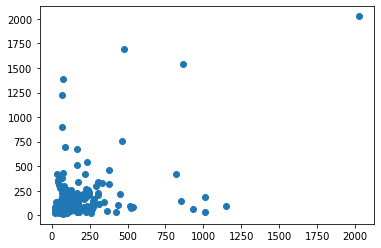

In [12]:
plt.scatter(rfm3m_m6m_df['monetary'], rfm3m_m6m_df['payment_value'])

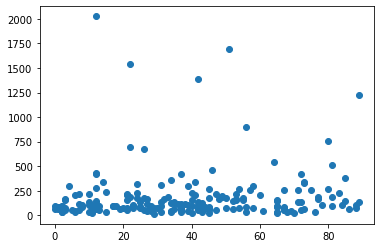

In [13]:
plt.scatter(rfm3m_m6m_df['recency'], rfm3m_m6m_df['payment_value'])

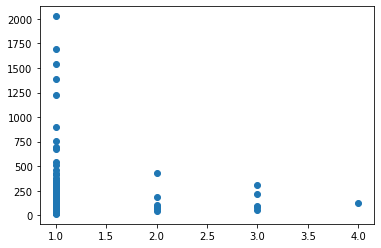

In [14]:
plt.scatter(rfm3m_m6m_df['frequency'], rfm3m_m6m_df['payment_value'])

In [15]:
rfm3m_m6m_df.reset_index(drop=True, inplace=True)
rfm3m_m6m_df.head()

,recency,frequency,monetary,payment_value
0,43,1,55.09,55.09
1,27,1,74.14,168.36
2,47,1,132.49,215.06
3,45,1,47.27,25.77
4,36,1,285.11,113.57


In [16]:
rfm3m_m6m_df.info()
rfm3m_m6m_df.recency.astype(float)
rfm3m_m6m_df.frequency.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
recency          196 non-null int64
frequency        196 non-null int64
monetary         196 non-null float64
payment_value    196 non-null float64
dtypes: float64(2), int64(2)
memory usage: 6.2 KB


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
191    1.0
192    1.0
193    1.0
194    1.0
195    1.0
Name: frequency, Length: 196, dtype: float64

In [20]:
y_train

47      46.69
151     67.43
66     189.35
63     224.60
106     59.10
        ...  
127     77.57
156     50.00
69      99.72
159     41.38
13     139.42
Name: payment_value, Length: 147, dtype: float64

In [21]:
X = rfm3m_m6m_df.iloc[:,:-1]
y = rfm3m_m6m_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# logistic regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))

Train Accuracy:  0.2381132253705548
Test Accuracy:  -0.21673969450071762
